# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)   
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.  
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (20, 6)

In [4]:
def get_cv_score(clf, X, y, heading, scoring='accuracy'):
    cv_score = cross_val_score(clf, X, y, cv=KFold(5, random_state=42), scoring=scoring)
    print('{} cv_results: {}'.format(heading, cv_score))
    print('{} cv_mean: {}'.format(heading, cv_score.mean()))

### 1\. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия. 

Предположение относительно данных:
- KNN -- близкие объекты выдают похожие ответы;
- Logistic Regression -- данные линейно разделимы.

KNN будет работать хуже, чем Logistic Regression, на выборке, у которой объекты разных классов находятся приблизительно на одинаковом расстоянии или ближе, чем объекты одного и того же класса.

In [5]:
X_1_1 = np.array([[elem + 5, elem] for elem in np.linspace(0, 300, num=100)], dtype='i4')
X_1_2 = np.array([[elem, elem + 10] for elem in np.linspace(0, 300, num=100)], dtype='i4')

Text(0.5,1,'Dataset for KNN and Logistic Regression (LR is better)')

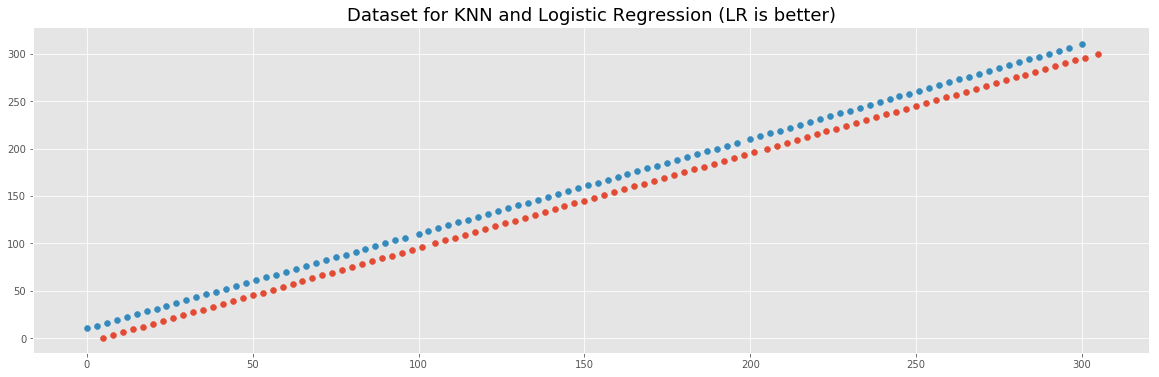

In [6]:
plt.scatter(X_1_1[:, 0], X_1_1[:, 1])
plt.scatter(X_1_2[:, 0], X_1_2[:, 1])
plt.title('Dataset for KNN and Logistic Regression (LR is better)', fontsize=18)

In [7]:
X_1 = np.vstack((X_1_1, X_1_2))
y_1 = [0] * 100 + [1] * 100

In [8]:
get_cv_score(KNeighborsClassifier(), X_1, y_1, 'KNN')

KNN cv_results: [0. 0. 0. 0. 0.]
KNN cv_mean: 0.0


In [9]:
get_cv_score(LogisticRegression(), X_1, y_1, 'Logistic Regression')

Logistic Regression cv_results: [1. 1. 1. 1. 1.]
Logistic Regression cv_mean: 1.0


На линейно разделимой выборке, где объекты первого и второго классов не образуют кластеры и находятся недалеко друг от друга, лучше результат показывает LogisticRegression.

### 2\. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

Предположение относительно данных:
- KNN -- близкие объекты выдают похожие ответы;
- Logistic Regression -- данные линейно разделимы.

KNN будет работать лучше, чем Logistic Regression, на выборке, которая не линейно разделима, у которой объекты разных классов находятся далеко друг от друга, а объекты одинаковых классов образуют кластеры.

In [10]:
X_2, y_2 = list(map(np.array, make_blobs(100, centers=8, random_state=42)))

Text(0.5,1,'Dataset for KNN and Logistic Regression (KNN is better)')

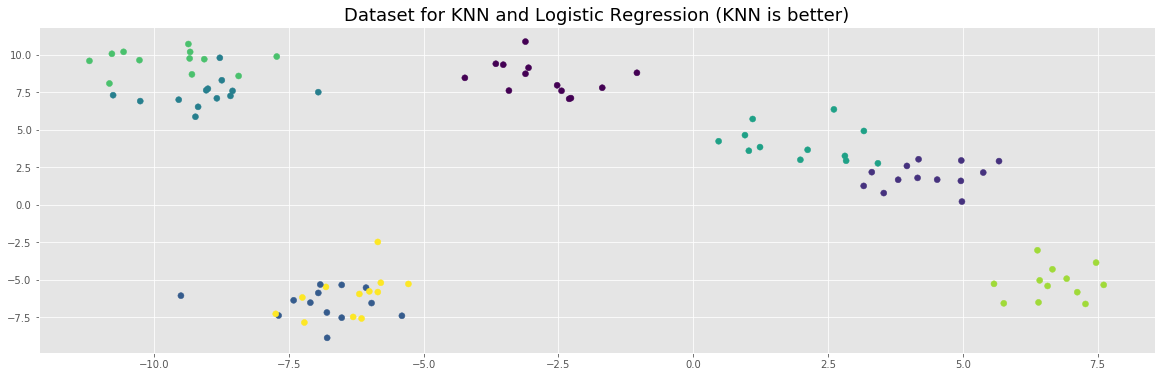

In [11]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2)
plt.title('Dataset for KNN and Logistic Regression (KNN is better)', fontsize=18)

In [12]:
get_cv_score(KNeighborsClassifier(), X_2, y_2, 'KNN')

KNN cv_results: [0.9  0.85 0.75 1.   0.7 ]
KNN cv_mean: 0.8400000000000001


In [13]:
get_cv_score(LogisticRegression(), X_2, y_2, 'Logistic Regression')

Logistic Regression cv_results: [0.6  0.4  0.65 0.45 0.4 ]
Logistic Regression cv_mean: 0.5


На не линейно разделимой выборке, где объекты одинаковых классов образуют кластеры, лучше результат показывает KNN.

### 3\. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

Метрики:
- cosine -- расстояние измеряется как косинус угла между векторами объектов;
- euclidean -- расстояние измеряется как длина прямой, соединяющей заданные объекты.

KNN с cosine будет работать лучше, чем KNN с euclidean, на выборке, на которой угол между векторами, принадлежащими к одному классу, будет меньше, чем угол между векторами, принадлежащими к разным классам.

In [14]:
X_3_1 = np.array([[elem + 5, elem] for elem in np.linspace(0, 300, num=100)], dtype='i4')
X_3_2 = np.array([[elem, elem + 10] for elem in np.linspace(0, 300, num=100)], dtype='i4')

Text(0.5,1,'Dataset for KNN with cosine and euclidean metrics')

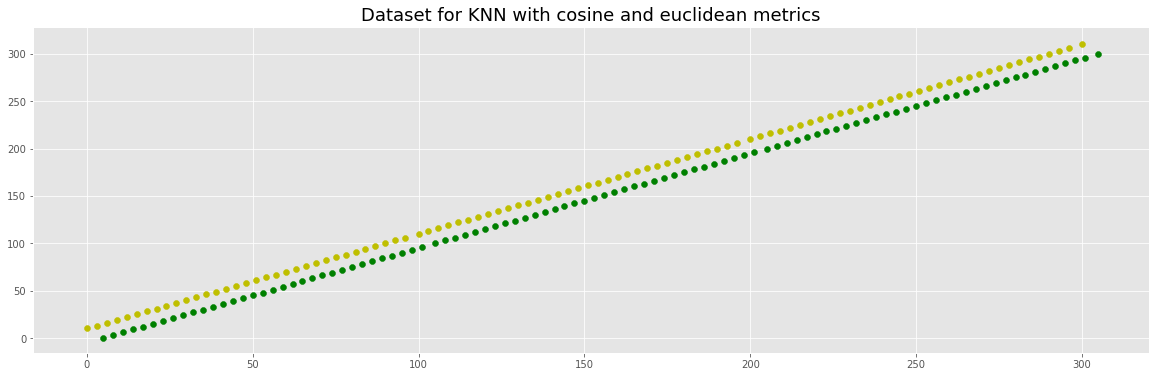

In [15]:
plt.scatter(X_3_1[:, 0], X_3_1[:, 1], c='g')
plt.scatter(X_3_2[:, 0], X_3_2[:, 1], c='y')
plt.title('Dataset for KNN with cosine and euclidean metrics', fontsize=18)

In [16]:
X_3 = np.vstack((X_3_1, X_3_2))
y_3 = [0] * 100 + [1] * 100

In [17]:
get_cv_score(KNeighborsClassifier(metric='cosine'), X_3, y_3, 'KNN cosine')

KNN cosine cv_results: [1. 1. 1. 1. 1.]
KNN cosine cv_mean: 1.0


In [18]:
get_cv_score(KNeighborsClassifier(metric='euclidean'), X_3, y_3, 'KNN euclidean')

KNN euclidean cv_results: [0. 0. 0. 0. 0.]
KNN euclidean cv_mean: 0.0


Если вектора одинаковых классов образуют прямую, то угол между их векторами будет меньше, чем угол между векторами разных классов, тогда как евклидово расстояние может быть приблизительно одинаковым. На таких данных лучше результат показывает KNN c cosine metric.

### 4\. Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия. 

Предположение относительно данных:
- Linear Regression -- есть линейная зависимость;
- Decision Tree Regressor -- возможно разделить данные с помощью разделяющей поверхности: на каждом узле происходит разбиение множества, ассоциированного с этим узлом, на подмножества.

In [19]:
X_4 = np.linspace(0, 300, num=100).reshape(-1, 1)
y_4 = np.linspace(0, 300, num=100, dtype='i4')

Text(0.5,1,'Dataset for Decision Tree Regressor and Linear Regression')

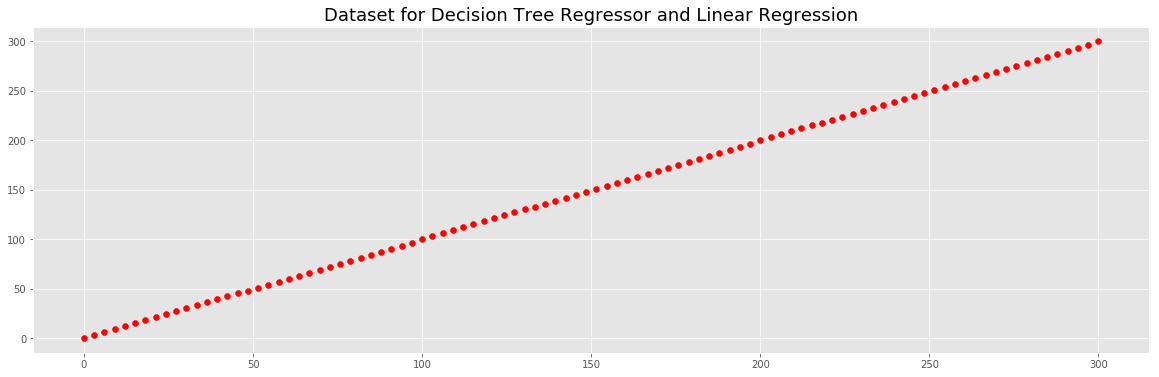

In [20]:
plt.scatter(X_4, y_4, c='r')
plt.title('Dataset for Decision Tree Regressor and Linear Regression', fontsize=18)

In [21]:
get_cv_score(LinearRegression(), X_4, y_4, 'Linear Regression',
             scoring='neg_mean_squared_error')

Linear Regression cv_results: [-0.06818205 -0.16560795 -0.02585556 -0.1622789  -0.07446507]
Linear Regression cv_mean: -0.09927790623433763


In [22]:
get_cv_score(DecisionTreeRegressor(random_state=42), X_4, y_4, 'DecisionTreeRegressor',
             scoring='neg_mean_squared_error')

DecisionTreeRegressor cv_results: [-1291.5   -354.75  -346.5   -356.9  -1297.55]
DecisionTreeRegressor cv_mean: -729.4399999999999


На выборке, у которой есть линейная зависимость, лучше результат показывает Linear Regression, поскольку Decision Tree Regressor пытается описать зависимость, разделяя множества на подмножества и строя "ступенчатую" кривую вместо линейной прямой.